In [1]:
from numpy import array, exp, random, dot, inf, linspace
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import colorama
# inf - бесконечность
# dot - скалярное произведение векторов
# exp - экспонента
colorama.init(autoreset=True)

# `НУЛЕВАЯ НЕЙРОСЕТЬ`

In [2]:
def act(x):
    """Функция активации"""
    return 0 if x < 0.5 else 1

In [3]:
def nn0(h, m, c):
    """Модель обученной нейросети (с готовыми весами)"""
    x = np.array([h, m, c])
    w11 = np.array([1.0, -0.3, 0])  # первый нейрон на первом слое
    w21 = np.array([0.4, -0.5, 1.0])  # второй нейрон на первом слое

    weight1 = np.array([[1.0, -0.3, 0], [0.4, -0.5, 1.0]])
    weight2 = np.array([-0.3, 1])

    sum_hidden = np.dot(weight1, x)
    print('Значение сумм на нейронах первого скрытого слоя: ', str(sum_hidden))
    out_hidden = np.array([act(x) for x in sum_hidden])
    print('Значения на выходах нейронов первого скрытого слоя: ', str(out_hidden))
    print()

    sum_hidden2 = np.dot(weight2, out_hidden)
    print('Значение сумм на нейронах второго скрытого слоя: ', str(sum_hidden2))
    y = act(sum_hidden2)
    print('Выходные значения: ' + str(y))
    return y

In [4]:
hockey = 0
music = 0
c = 1

res = nn0(hockey, music, c)
res

Значение сумм на нейронах первого скрытого слоя:  [0. 1.]
Значения на выходах нейронов первого скрытого слоя:  [0 1]

Значение сумм на нейронах второго скрытого слоя:  1.0
Выходные значения: 1


1

# `ПЕРВАЯ НЕЙРОСЕТЬ`

In [2]:
def eps(type_eps, x1, x2):
    """Погрешность"""
    if type_eps == 'rel':
        try:
            return (x2 - x1) / x1  # относительная
        except ZeroDivisionError:
            return inf
    if type_eps == 'abs': return x2 - x1  # абсолютная

In [3]:
def sigmoid(x):
    """Функция активизации (сигмоида)"""
    # признаки + весы -> признаки
    # g(x, w) - y(x)
    return 1 / (1 + exp(-x))

In [4]:
def get_DB(rows, cols):
    """создание базы данных для обучения/теста"""
    df = []
    passed = []
    for i in range(rows):
        while True:
            templ_df = [randint(0, 1) for j in range(cols)]
            if templ_df not in passed:
                df.append(templ_df)
                passed.append(df[-1])
                break
    return array(df).T

In [5]:
def get_ans_for_DB(df):
    """получение ответов на заданную базу данных"""
    res = [[]]  # список ответов
    for i in df:
        ans = i[0] # промежуточный ответ на каждый пункт
        for j, el in enumerate(i):
            # просто набор условий для получения ответа
            if not j % 2:
                ans = ans and el
            elif not j % 3:
                ans = ans or el
            elif not j % 5:
                ans = ans and not el
            else:
                ans = ans or not el
        res[0].append(ans)
    return array(res).T

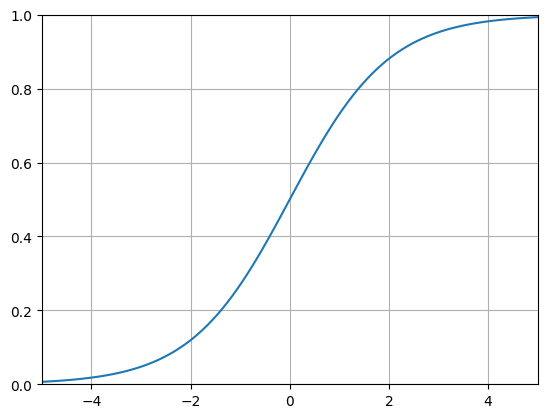

In [6]:
# сигмоида

plt.plot(linspace(-5, 5, 100), [sigmoid(x) for x in linspace(-5, 5, 100)])
plt.grid(True)
plt.xlim(-5, 5)
plt.ylim(0, 1)
plt.show()

In [7]:
training_inputs = array([[0, 0, 1],
                         [1, 1, 1],
                         [1, 0, 1],
                         [0, 1, 1],
                         [0, 0, 0]]) # данные для обучения
training_outputs = array([[0, 1, 1, 0, 0]]).T  # ответы на данные для обучения
new_inputs = array([1, 0, 0])  # тестовые данные

In [8]:
# красивый вывод данных

res = ''
for i, el in enumerate(training_inputs):
    res += f'{" ".join(list(map(str, el)))} | {" ".join(list(map(str, training_outputs[i])))}\n'
print(res)

0 0 1 | 0
1 1 1 | 1
1 0 1 | 1
0 1 1 | 0
0 0 0 | 0



In [9]:
random.seed(1)  # начальное семя рандома
synaptic_weights = 2 * random.random((len(training_inputs[0]), 1)) - 1  # генерация случайных значений для матрицы от -1 до 1
print('Случайные инициализированные весы:\n', synaptic_weights)

Случайные инициализированные весы:
 [[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]


In [10]:
N = 100  # количество тренировок (эпох)

In [11]:
# метод обратного распространения
y_list = []  # список из эпох обучения
x_list = []  # список из погрешностей при обучении
# поиск оптимальных весов
for i in tqdm(range(N)):
    input_layer = training_inputs
    outputs = sigmoid(dot(input_layer, synaptic_weights))  # g(x, w) -> y(x)
    print(np.shape(input_layer), np.shape(synaptic_weights))
    print(np.shape(outputs))
    print()
    err = training_outputs - outputs  # абсолютная погрешность
    y_list.append(err)
    x_list.append(i)
    adjustments = dot(input_layer.T, err * (outputs * (1 - outputs))) # улучшение весов
    synaptic_weights += adjustments
#print('Весы после обучения:\n', synaptic_weights)

  0%|          | 0/100 [00:00<?, ?it/s]

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) 

(3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)



 33%|███▎      | 33/100 [00:00<00:00, 321.36it/s]

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)



 69%|██████▉   | 69/100 [00:00<00:00, 333.93it/s]

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)

(5, 3) (3, 1)
(5, 1)



100%|██████████| 100/100 [00:00<00:00, 327.50it/s]


Результат:
[0.11035029] eps=-11.035029233053617 %
[0.91041229] eps=8.958770991929555 %
[0.92564882] eps=7.435118234464766 %
[0.09193919] eps=-9.193919237503557 %
[0.5] eps=-50.0 %


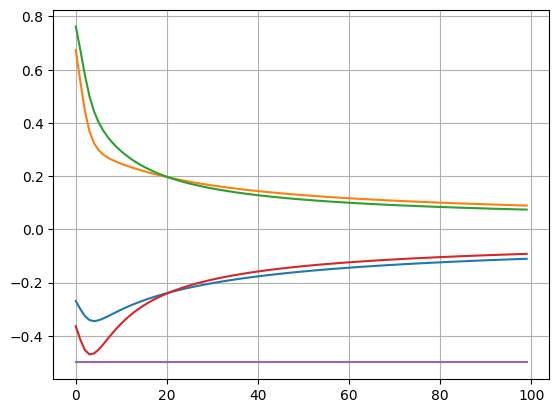

In [12]:
print('Результат:')
for r in range(len(outputs)): 
    print(f"{outputs[r]} eps={eps('abs', outputs[r][0], training_outputs[r][0])*100} %")

# график погрешности значения от количества эпох
plt.figure()
plt.grid(True)
for i in range(len(y_list[0])):
    y = []
    for j in range(len(y_list)):
        y.append(y_list[j][i])
    plt.plot(x_list, y)

In [13]:
output = sigmoid(dot(new_inputs, synaptic_weights))
print(f'Новая ситуация {new_inputs}:', colorama.Fore.RED + str(round(output[0], 1)))

Новая ситуация [1 0 0]: 1.0
